In [3]:
import os
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import gzip
import numpy as np
import seaborn as sns
import itertools
from IPython.display import Markdown, display
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.preprocessing import StandardScaler

In [1]:
n = 5
with open('data/users.csv') as lines:
  for i in range(n):
    print(next(lines))

ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS

1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0

545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0

10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0

fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0



In [4]:
df = pd.read_csv('data/users.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       9944 non-null   object
 1   HAS_EMAIL                9944 non-null   int64 
 2   PHONE_COUNTRY            9944 non-null   object
 3   IS_FRAUDSTER             9944 non-null   bool  
 4   TERMS_VERSION            8417 non-null   object
 5   CREATED_DATE             9944 non-null   object
 6   STATE                    9944 non-null   object
 7   COUNTRY                  9944 non-null   object
 8   BIRTH_YEAR               9944 non-null   int64 
 9   KYC                      9944 non-null   object
 10  FAILED_SIGN_IN_ATTEMPTS  9944 non-null   int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 786.7+ KB


In [6]:
df.head()

,ID,HAS_EMAIL,PHONE_COUNTRY,IS_FRAUDSTER,TERMS_VERSION,CREATED_DATE,STATE,COUNTRY,BIRTH_YEAR,KYC,FAILED_SIGN_IN_ATTEMPTS
0,1872820f-e3ac-4c02-bdc7-727897b60043,1,GB||JE||IM||GG,False,2018-05-25,2017-08-06 07:33:33.341000,ACTIVE,GB,1971,PASSED,0
1,545ff94d-66f8-4bea-b398-84425fb2301e,1,GB||JE||IM||GG,False,2018-01-01,2017-03-07 10:18:59.427000,ACTIVE,GB,1982,PASSED,0
2,10376f1a-a28a-4885-8daa-c8ca496026bb,1,ES,False,2018-09-20,2018-05-31 04:41:24.672000,ACTIVE,ES,1973,PASSED,0
3,fd308db7-0753-4377-879f-6ecf2af14e4f,1,FR,False,2018-05-25,2018-06-01 17:24:23.852000,ACTIVE,FR,1986,PASSED,0
4,755fe256-a34d-4853-b7ca-d9bb991a86d3,1,GB||JE||IM||GG,False,2018-09-20,2017-08-09 15:03:33.945000,ACTIVE,GB,1989,PASSED,0


In [8]:
n = 5
with open('./data/transactions.csv') as transactions:
  for _ in range(n):
    print(next(transactions))

CURRENCY,AMOUNT,STATE,CREATED_DATE,MERCHANT_CATEGORY,MERCHANT_COUNTRY,ENTRY_METHOD,USER_ID,TYPE,SOURCE,ID,AMOUNT_USD

GBP,4420,COMPLETED,2017-12-10 16:38:55.577,,NLD,chip,3ff52b92-d416-4e22-8cad-018f500d4bbc,ATM,GAIA,367bf5f9-7cce-4683-90b9-d3c011bf4c87,3268.0

PLN,1500,COMPLETED,2017-12-10 16:37:24.792,point_of_interest,POL,manu,76cbaad3-4721-4a3b-92b9-3eb9e9319565,CARD_PAYMENT,GAIA,ff6802b9-360d-4efe-b09b-f99c6cac3383,

GBP,191,COMPLETED,2017-12-10 16:37:16.234,airport,PRT,chip,7bcaa34e-b889-4582-9c29-0b3bab34fb8c,CARD_PAYMENT,GAIA,ddb4a930-7d8a-4f38-9079-ddc4b0db980e,141.0

GBP,10000,COMPLETED,2017-12-10 16:34:42.592,,,misc,b3a6762b-a940-4459-bb1d-8e28e151f901,TOPUP,HERA,080ef0be-850a-4f14-ab03-28ff68e6b797,7394.0



In [7]:
tr = pd.read_csv('./data/transactions.csv')

In [10]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688651 entries, 0 to 688650
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CURRENCY           688651 non-null  object 
 1   AMOUNT             688651 non-null  int64  
 2   STATE              688651 non-null  object 
 3   CREATED_DATE       688651 non-null  object 
 4   MERCHANT_CATEGORY  223065 non-null  object 
 5   MERCHANT_COUNTRY   483055 non-null  object 
 6   ENTRY_METHOD       688651 non-null  object 
 7   USER_ID            688651 non-null  object 
 8   TYPE               688651 non-null  object 
 9   SOURCE             688651 non-null  object 
 10  ID                 688651 non-null  object 
 11  AMOUNT_USD         635328 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 63.0+ MB


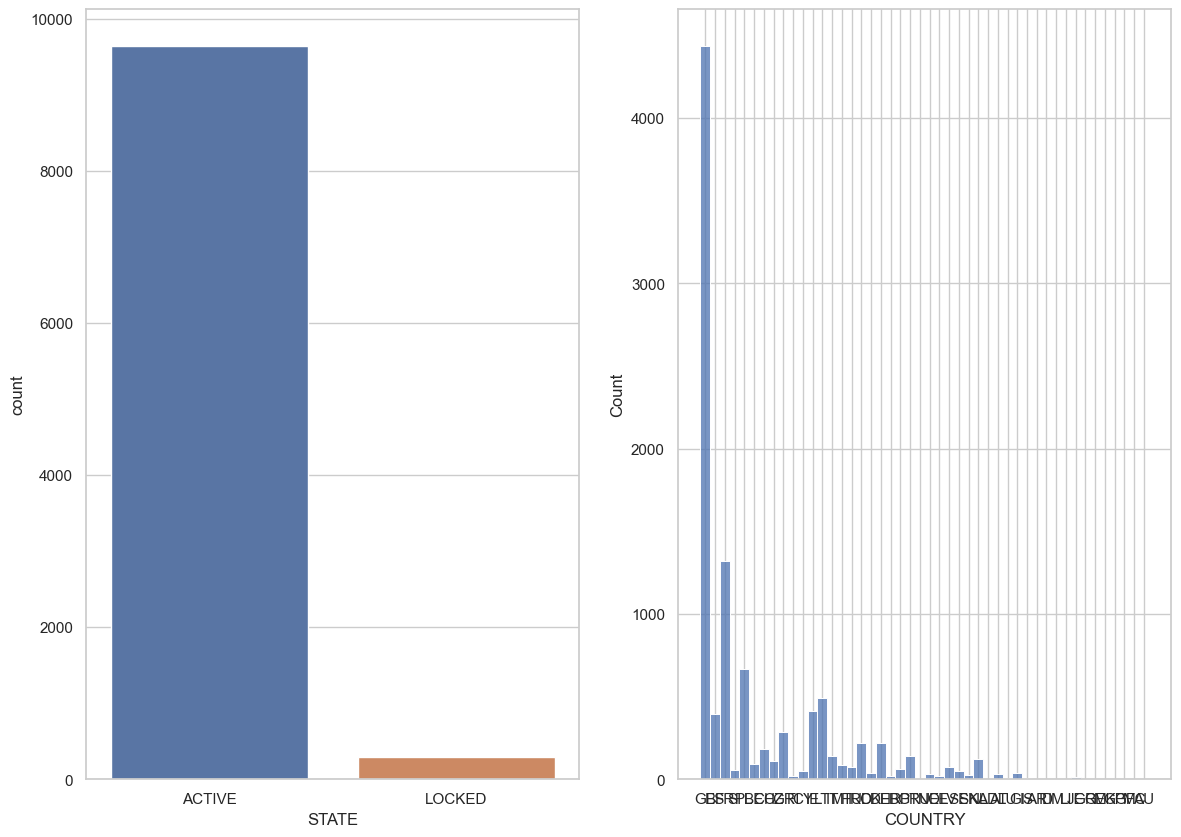

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization settings
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

sns.countplot(x='STATE', data=df, ax=axes[0])

sns.histplot(df['COUNTRY'], ax=axes[1])

plt.show()

In [11]:
#join the models
df_m = pd.merge(df, tr, how='inner', left_on='ID', right_on='USER_ID')

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit(df_m[['MERCHANT_CATEGORY', 'MERCHANT_COUNTRY']])
df_m[['MERCHANT_CATEGORY', 'MERCHANT_COUNTRY']] = imputer.transform(df_m[['MERCHANT_CATEGORY', 'MERCHANT_COUNTRY']])


In [12]:
df_m['AMOUNT_USD'].describe()

count    5.861250e+05
mean     6.862871e+03
std      7.502182e+04
min      0.000000e+00
25%      3.470000e+02
50%      1.008000e+03
75%      3.689000e+03
max      1.641211e+07
Name: AMOUNT_USD, dtype: float64

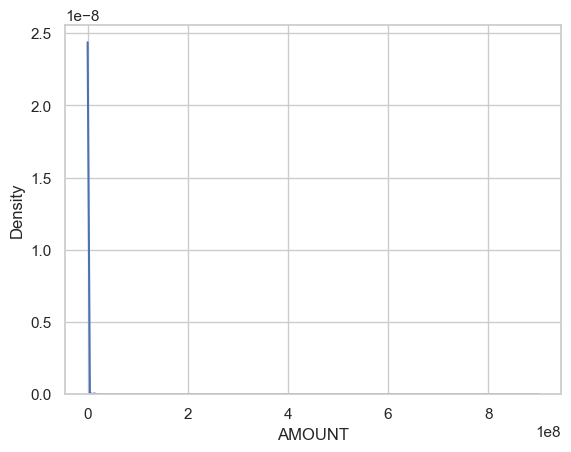

In [13]:
sns.kdeplot(df_m, x="AMOUNT")

plt.show()

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='missing')
imputer.fit(df_m[['MERCHANT_CATEGORY', 'MERCHANT_COUNTRY', 'TERMS_VERSION']])
df_m[['MERCHANT_CATEGORY', 'MERCHANT_COUNTRY', 'TERMS_VERSION']] = imputer.transform(df_m[['MERCHANT_CATEGORY', 'MERCHANT_COUNTRY','TERMS_VERSION']])


In [15]:
from sklearn.impute import SimpleImputer
imputer2 = SimpleImputer(strategy='median')
imputer2.fit(df_m[['AMOUNT_USD']])
df_m[['AMOUNT_USD']] = imputer2.transform(df_m[['AMOUNT_USD']])


In [17]:
df_m.describe()

,HAS_EMAIL,BIRTH_YEAR,FAILED_SIGN_IN_ATTEMPTS,AMOUNT,AMOUNT_USD
count,638742.000000,638742.000000,638742.000000,6.387420e+05,6.387420e+05
mean,0.989255,1984.940629,0.009552,3.247871e+04,6.380570e+03
std,0.103098,9.887922,0.141177,2.380562e+06,7.188344e+04
min,0.000000,1927.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.000000,1980.000000,0.000000,4.670000e+02,3.870000e+02
50%,1.000000,1987.000000,0.000000,1.393000e+03,1.008000e+03
75%,1.000000,1992.000000,0.000000,5.000000e+03,3.195000e+03
max,1.000000,2000.000000,6.000000,9.000000e+08,1.641211e+07


In [18]:
median = 1008
std = 71883
high = median + 1.5 * std
low = median - 1.5 * std
print("IQR =", high - low)
print("Highest =", high) 

df_m['OUTLIER_HIGH'] = False
# set outlier_high to True for all rows where AMOUNT_USD is greater than high
df_m.loc[df_m['AMOUNT_USD'] > high, 'OUTLIER_HIGH'] = True



IQR = 215649.0
Highest = 108832.5


In [19]:
df_m["OUTLIER_HIGH"].describe()

count     638742
unique         2
top        False
freq      634853
Name: OUTLIER_HIGH, dtype: object

In [20]:
median = 1393
std = 2380562
high = median + 1.5 * std
low = median - 1.5 * std
print("IQR =", high - low)
print("Highest =", high) 

df_m['OUTLIER_HIGH_2'] = False
# set outlier_high to True for all rows where AMOUNT_USD is greater than high
df_m.loc[df_m['AMOUNT'] > high, 'OUTLIER_HIGH_2'] = True



IQR = 7141686.0
Highest = 3572236.0


In [21]:
df_m["OUTLIER_HIGH_2"].describe()

count     638742
unique         2
top        False
freq      638361
Name: OUTLIER_HIGH_2, dtype: object

In [22]:
df_out2 = df_m[df_m["OUTLIER_HIGH_2"] == True]

In [23]:
test = df_m[df_m['IS_FRAUDSTER'] == True]

In [24]:
test["USER_ID"].groupby(test["USER_ID"]).count().sort_values(ascending=False).value_counts

<bound method IndexOpsMixin.value_counts of USER_ID
dc283b17-bbe1-4ae9-a11c-0029d5ae71d9    1029
4ee8690a-ebf7-435b-9fe2-103e8f83edc6     508
25c2ecb3-5ec7-4fa6-8fc3-bbcf3a691217     460
b8271606-4633-4d8f-8729-a2c8ebb8a49f     340
e43ca889-da03-4192-badd-b4f2ca8fb9a1     274
                                        ... 
90c600ac-23f9-4417-a5bc-c10600bf54d4       2
f9aa3e8a-caf9-4335-8a26-8dcded6213bc       2
27c76eda-e159-4df3-845a-e13f4e28a8b5       2
3f5a6056-fbb1-489e-b6a3-c43393b1f9c3       2
83fd347e-5de7-4280-8b84-a521e959d82d       1
Name: USER_ID, Length: 297, dtype: int64>

In [25]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638742 entries, 0 to 638741
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID_x                     638742 non-null  object 
 1   HAS_EMAIL                638742 non-null  int64  
 2   PHONE_COUNTRY            638742 non-null  object 
 3   IS_FRAUDSTER             638742 non-null  bool   
 4   TERMS_VERSION            638742 non-null  object 
 5   CREATED_DATE_x           638742 non-null  object 
 6   STATE_x                  638742 non-null  object 
 7   COUNTRY                  638742 non-null  object 
 8   BIRTH_YEAR               638742 non-null  int64  
 9   KYC                      638742 non-null  object 
 10  FAILED_SIGN_IN_ATTEMPTS  638742 non-null  int64  
 11  CURRENCY                 638742 non-null  object 
 12  AMOUNT                   638742 non-null  int64  
 13  STATE_y                  638742 non-null  object 
 14  CREA

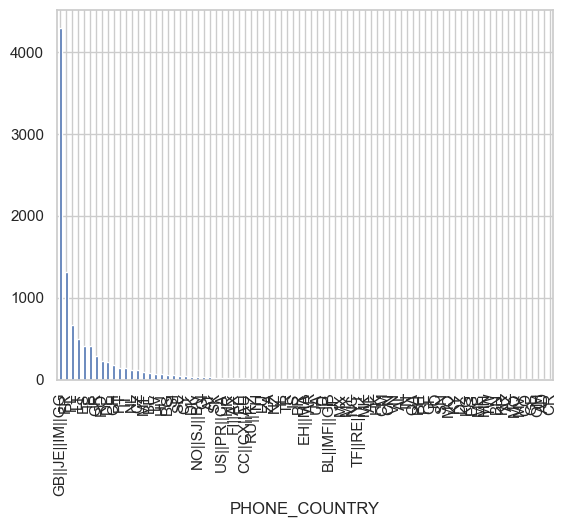

In [26]:
import matplotlib.pyplot as plt
# df["PHONE_COUNTRY"].head()
# df["PHONE_COUNTRY"].value_counts()
df["PHONE_COUNTRY"].value_counts().plot(kind="bar")
plt.show()



In [27]:
df_m["HAS_MULTIPLE_PHONE_COUNTRIES"] = False
# test = df_m[df_m["PHONE_COUNTRY"].str.len() > 3]

df_m.loc[df_m["PHONE_COUNTRY"].str.len() > 3, "HAS_MULTIPLE_PHONE_COUNTRIES"] = True


In [28]:
res = df_m.pivot_table(index=['HAS_MULTIPLE_PHONE_COUNTRIES'],columns=['IS_FRAUDSTER'],values='USER_ID', aggfunc='count')
res


IS_FRAUDSTER,False,True
HAS_MULTIPLE_PHONE_COUNTRIES,,
False,298508,1069
True,326320,12845


In [29]:
res = df_m.pivot_table(index=['OUTLIER_HIGH'],columns=['IS_FRAUDSTER'],values='USER_ID', aggfunc='count')
res


IS_FRAUDSTER,False,True
OUTLIER_HIGH,,
False,621471,13382
True,3357,532


In [30]:
res = pd.crosstab(index=df_m['OUTLIER_HIGH'],columns=df_m['IS_FRAUDSTER'])
res

IS_FRAUDSTER,False,True
OUTLIER_HIGH,,
False,621471,13382
True,3357,532


In [31]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638742 entries, 0 to 638741
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ID_x                          638742 non-null  object 
 1   HAS_EMAIL                     638742 non-null  int64  
 2   PHONE_COUNTRY                 638742 non-null  object 
 3   IS_FRAUDSTER                  638742 non-null  bool   
 4   TERMS_VERSION                 638742 non-null  object 
 5   CREATED_DATE_x                638742 non-null  object 
 6   STATE_x                       638742 non-null  object 
 7   COUNTRY                       638742 non-null  object 
 8   BIRTH_YEAR                    638742 non-null  int64  
 9   KYC                           638742 non-null  object 
 10  FAILED_SIGN_IN_ATTEMPTS       638742 non-null  int64  
 11  CURRENCY                      638742 non-null  object 
 12  AMOUNT                        638742 non-nul

In [32]:
X = df_m[["HAS_EMAIL", "TERMS_VERSION", "BIRTH_YEAR", "KYC",
            "OUTLIER_HIGH", "OUTLIER_HIGH_2","HAS_MULTIPLE_PHONE_COUNTRIES", "AMOUNT", "AMOUNT_USD"]]
Y = df_m["IS_FRAUDSTER"]

In [33]:

new_cols = pd.get_dummies(X[["TERMS_VERSION", "KYC"]], drop_first=True)
X = pd.concat([X, new_cols], axis=1)

In [34]:
X=X.drop(["TERMS_VERSION", "KYC"], axis=1)
X.columns

Index(['HAS_EMAIL', 'BIRTH_YEAR', 'OUTLIER_HIGH', 'OUTLIER_HIGH_2',
       'HAS_MULTIPLE_PHONE_COUNTRIES', 'AMOUNT', 'AMOUNT_USD',
       'TERMS_VERSION_2017-02-02', 'TERMS_VERSION_2018-01-01',
       'TERMS_VERSION_2018-01-13', 'TERMS_VERSION_2018-03-20',
       'TERMS_VERSION_2018-05-25', 'TERMS_VERSION_2018-09-20',
       'TERMS_VERSION_missing', 'KYC_NONE', 'KYC_PASSED', 'KYC_PENDING'],
      dtype='object')

In [35]:
X_corr = X.corr().abs()
X_corr.head()

,HAS_EMAIL,BIRTH_YEAR,OUTLIER_HIGH,OUTLIER_HIGH_2,HAS_MULTIPLE_PHONE_COUNTRIES,AMOUNT,AMOUNT_USD,TERMS_VERSION_2017-02-02,TERMS_VERSION_2018-01-01,TERMS_VERSION_2018-01-13,TERMS_VERSION_2018-03-20,TERMS_VERSION_2018-05-25,TERMS_VERSION_2018-09-20,TERMS_VERSION_missing,KYC_NONE,KYC_PASSED,KYC_PENDING
HAS_EMAIL,1.000000,0.010204,0.006010,0.002546,0.029785,0.001176,0.002868,0.004882,0.011240,0.001469,0.010131,0.026399,0.066403,0.256160,0.284749,0.227754,0.001153
BIRTH_YEAR,0.010204,1.000000,0.039800,0.011669,0.005100,0.006580,0.034225,0.009935,0.022881,0.041190,0.012849,0.000388,0.014592,0.007472,0.020418,0.006557,0.047744
OUTLIER_HIGH,0.006010,0.039800,1.000000,0.032708,0.014760,0.014493,0.411808,0.002053,0.000702,0.000864,0.004495,0.001984,0.000295,0.000490,0.006636,0.008163,0.016221
OUTLIER_HIGH_2,0.002546,0.011669,0.032708,1.000000,0.003944,0.363612,0.256301,0.001707,0.000831,0.000228,0.002500,0.001345,0.002810,0.004671,0.002143,0.000179,0.003909
HAS_MULTIPLE_PHONE_COUNTRIES,0.029785,0.005100,0.014760,0.003944,1.000000,0.001307,0.016344,0.042592,0.006117,0.031016,0.049581,0.002830,0.078663,0.072741,0.041715,0.001450,0.041096


<Axes: >

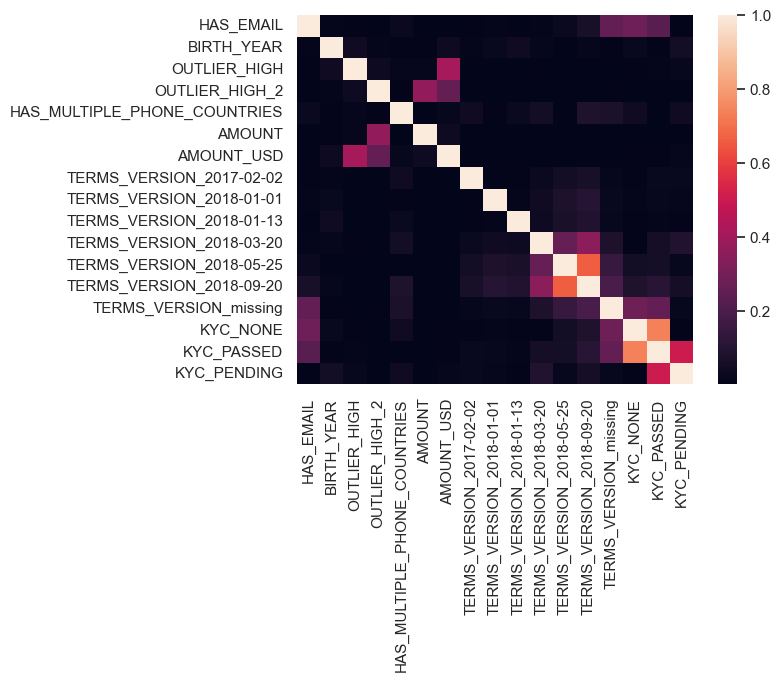

In [36]:
sns.heatmap(X_corr)

In [37]:
# https://h1ros.github.io/posts/drop-highly-correlated-features/
import numpy as np
threshold = 0.9

columns = np.full((X_corr.shape[0],), True, dtype=bool)
for i in range(X_corr.shape[0]):
    for j in range(i+1, X_corr.shape[0]):
        if X_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
selected_columns

X = X[selected_columns]

In [85]:
from sklearn.model_selection import train_test_split
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.columns

Index(['HAS_EMAIL', 'BIRTH_YEAR', 'OUTLIER_HIGH', 'OUTLIER_HIGH_2',
       'HAS_MULTIPLE_PHONE_COUNTRIES', 'AMOUNT', 'AMOUNT_USD',
       'TERMS_VERSION_2017-02-02', 'TERMS_VERSION_2018-01-01',
       'TERMS_VERSION_2018-01-13', 'TERMS_VERSION_2018-03-20',
       'TERMS_VERSION_2018-05-25', 'TERMS_VERSION_2018-09-20',
       'TERMS_VERSION_missing', 'KYC_NONE', 'KYC_PASSED', 'KYC_PENDING'],
      dtype='object')

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[["AMOUNT", "AMOUNT_USD"]])

StandardScaler()

In [88]:
X_train[["AMOUNT", "AMOUNT_USD"]] = scaler.transform(X_train[["AMOUNT", "AMOUNT_USD"]])
X_test[["AMOUNT", "AMOUNT_USD"]] = scaler.transform(X_test[["AMOUNT", "AMOUNT_USD"]])

In [89]:
X_train[["AMOUNT", "AMOUNT_USD"]].describe()

,AMOUNT,AMOUNT_USD
count,5.109930e+05,5.109930e+05
mean,5.909683e-19,-2.989604e-18
std,1.000001e+00,1.000001e+00
min,-1.314640e-02,-9.217558e-02
25%,-1.296059e-02,-8.657169e-02
50%,-1.259217e-02,-7.754159e-02
75%,-1.115276e-02,-4.595074e-02
max,3.588418e+02,2.381765e+02


In [91]:


from sklearn.linear_model import LogisticRegression
linear = LogisticRegression(max_iter=1000)
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test) 



In [92]:
res = pd.DataFrame(y_pred)
res.value_counts()

False    127327
True        422
Name: count, dtype: int64

In [93]:
linear.score(X_test, y_test)

0.981111398132275

In [97]:
from sklearn.metrics import accuracy_score
print("y_pred:", res.value_counts())

print("y_test:", y_test.value_counts())
print("testing accuracy",accuracy_score(y_test, linear.predict(X_test)))


y_pred: False    127327
True        422
Name: count, dtype: int64
y_test: IS_FRAUDSTER
False    124990
True       2759
Name: count, dtype: int64
testing accuracy 0.981111398132275


In [107]:
y_train_num = y_train.copy().map({True: 1, False: 0})
y_test_num = y_test.copy().map({True: 1, False: 0})



In [108]:
y_test_num.value_counts()

IS_FRAUDSTER
0    124990
1      2759
Name: count, dtype: int64

In [106]:

from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(X_train, y_train_num)
LR_predictions = clf.predict(X_test)


In [109]:
print(pd.DataFrame(LR_predictions).value_counts())
print(y_test_num.value_counts())
print ('Accuracy of logistic regression: %d ' % float((np.dot(y_test_num,LR_predictions) + np.dot(1-y_test_num,1-LR_predictions))/float(y_test.size)*100) +
           '% ' + "(percentage of correctly labelled datapoints)")


0    127339
1       410
Name: count, dtype: int64
IS_FRAUDSTER
0    124990
1      2759
Name: count, dtype: int64
Accuracy of logistic regression: 98 % (percentage of correctly labelled datapoints)


In [116]:
zipped = np.column_stack((LR_predictions, np.array(y_test_num)))


In [131]:
df_z = pd.DataFrame(zipped)
TP = df_z[(df_z[0] == 1) & (df_z[1] == 1)]
FP = df_z[(df_z[0] == 1) & (df_z[1] == 0)]
FN = df_z[(df_z[0] == 0) & (df_z[1] == 1)]

tp_c = TP.shape[0]
fp_c = FP.shape[0]
fn_c = FN.shape[0]

print('TP:', TP.shape[0])
print('FP:', FP.shape[0])
print('FN:', FN.shape[0])

TP: 378
FP: 32
FN: 2381


In [134]:
precision = tp_c/(fp_c + tp_c)
recall = tp_c/(tp_c + fn_c)
f1_score = 2 * (precision * recall) / (precision + recall)  
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score) 

Precision:  0.9219512195121952
Recall:  0.13700616165277274
F1 Score:  0.23856106027137897


In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)


0.04269286412722763
0.01787471174387349
0.13369634155007193


In [45]:
linear.score(X_test, y_test)

0.1540842778592323

In [46]:
print(linear.coef_)
print(linear.intercept_)
print(linear.feature_names_in_)

[ 4.75739399e-02  5.21106070e-04  9.81591822e-02 -3.59271927e-02
  2.48587848e-02  2.49643667e-04  1.31549113e-03  1.79518703e-01
  7.66184461e-02  4.71992524e-02  7.04435737e-02  2.68292844e-02
  9.13323933e-03  8.65658843e-02 -1.90928608e-01 -1.49420378e-01
  5.77998936e-01]
-0.9541591533078517
['HAS_EMAIL' 'BIRTH_YEAR' 'OUTLIER_HIGH' 'OUTLIER_HIGH_2'
 'HAS_MULTIPLE_PHONE_COUNTRIES' 'AMOUNT' 'AMOUNT_USD'
 'TERMS_VERSION_2017-02-02' 'TERMS_VERSION_2018-01-01'
 'TERMS_VERSION_2018-01-13' 'TERMS_VERSION_2018-03-20'
 'TERMS_VERSION_2018-05-25' 'TERMS_VERSION_2018-09-20'
 'TERMS_VERSION_missing' 'KYC_NONE' 'KYC_PASSED' 'KYC_PENDING']


In [49]:
# check multi-collinearity
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1] - 1)
df_pca = pd.DataFrame(pca.fit_transform(X))
df_pca.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,17553.641544,30730.972777,-13.796094,0.833599,-0.329737,-0.307956,-0.062843,0.010509,-0.010547,-0.010540,-0.006430,-0.002836,0.023190,0.000009,-0.000809,-0.001122
1,-7463.312820,14634.292269,-13.872144,0.833377,-0.331596,-0.308082,-0.062916,0.010634,-0.010501,-0.010548,-0.006666,-0.002763,0.016093,-0.000576,-0.000780,-0.001151
2,-30263.401475,-4441.722968,-13.962083,0.833117,-0.333797,-0.308228,-0.063002,0.010782,-0.010447,-0.010557,-0.006946,-0.002676,0.007685,-0.001268,-0.000745,-0.001184
3,-31294.345980,-5338.638475,-13.966311,0.833105,-0.333900,-0.308235,-0.063006,0.010789,-0.010444,-0.010558,-0.006960,-0.002672,0.007290,-0.001300,-0.000743,-0.001186
4,-31484.619504,-5598.438371,-13.967532,0.833101,-0.333930,-0.308237,-0.063007,0.010791,-0.010443,-0.010558,-0.006963,-0.002671,0.007176,-0.001310,-0.000743,-0.001186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638737,-31884.937115,-5900.017361,13.031200,0.176619,-0.547464,0.238231,0.980318,-0.216182,-0.264441,-0.017541,-0.110556,-0.024749,-0.000260,0.018869,-0.012062,-0.004795
638738,-31158.363947,-5355.781722,13.033768,0.176626,-0.547401,0.238235,0.980320,-0.216186,-0.264442,-0.017540,-0.110549,-0.024751,-0.000020,0.018889,-0.012063,-0.004794
638739,-32127.129574,-6082.762573,13.030338,0.176616,-0.547485,0.238230,0.980317,-0.216181,-0.264440,-0.017541,-0.110559,-0.024748,-0.000340,0.018862,-0.012062,-0.004795
638740,-31484.511104,-5495.438367,-26.966813,0.738736,0.647524,-0.129597,-0.022860,-0.004460,-0.012319,-0.011286,-0.003679,0.005071,0.007020,0.012827,0.001588,-0.001398


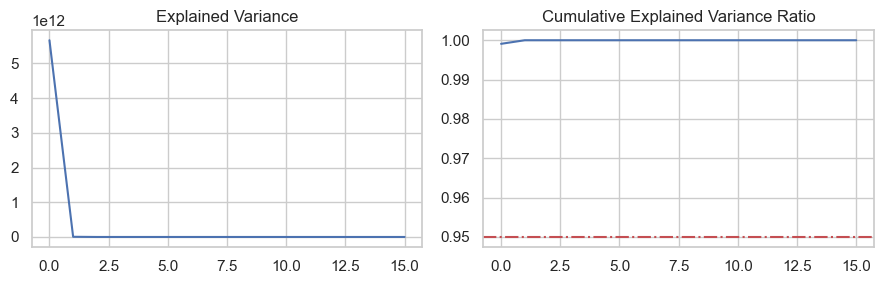

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
axes[0].plot(pca.explained_variance_);
axes[0].set_title('Explained Variance')
axes[1].plot(np.cumsum(pca.explained_variance_ratio_));
axes[1].axhline(y=0.95, c='r', ls='-.')
axes[1].set_title('Cumulative Explained Variance Ratio')
plt.tight_layout()

In [51]:
pca = PCA(n_components=2, copy=True, whiten=False, tol=0.0)
pca.fit(X)
X_pca = pca.transform(X)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [60]:
y_train.shape

(510993,)

In [73]:
pca_linear = LinearRegression()
pca_linear.fit(X_train, y_train)
y_pred = pca_linear.predict(X_test)

In [75]:
y_test.value_counts()

IS_FRAUDSTER
False    124990
True       2759
Name: count, dtype: int64

In [83]:
y_pred = pd.DataFrame(y_pred)
y_pred_pca = y_pred[y_pred[0] > .1]

In [84]:
y_pred_pca.value_counts()

0.807761    14
0.807763    11
0.802552     7
0.819715     6
0.180045     5
            ..
0.171787     1
0.171713     1
0.171711     1
0.171626     1
0.914429     1
Name: count, Length: 1791, dtype: int64

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(pca_linear.score(X_test, y_test))
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

4.2562862611172925e-05
MAE:  0.042455205029876396
MSE:  0.021129706514662627
RMSE:  0.14536060853842978


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
from sklearn.metrics import accuracy_score
print("Decision Tree training accuracy",accuracy_score(y_train, tree_model.predict(X_train)))
print("Random Forest training accuracy",accuracy_score(y_train, rf_model.predict(X_train)))

Decision Tree training accuracy 0.9970312704870713
Random Forest training accuracy 0.9970195286432495


In [67]:
from sklearn.metrics import accuracy_score
print("Decision Tree testing accuracy",accuracy_score(y_test, tree_model.predict(X_test)))
print("Random Forest testing accuracy",accuracy_score(y_test, rf_model.predict(X_test)))

Decision Tree testing accuracy 0.9828178694158075
Random Forest testing accuracy 0.9861603613335526


In [68]:
y_pred = rf_model.predict(X_test)

In [71]:
res = pd.DataFrame(y_pred)
res.value_counts()

False    125614
True       2135
Name: count, dtype: int64

In [72]:
y_test.value_counts()

IS_FRAUDSTER
False    124990
True       2759
Name: count, dtype: int64